# Performance

Obviously, using unit-aware variables will slow down any computation compared to raw python values (int, flot, numpy.ndarray).

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib

from physipy import Dimension, units, quantify, Quantity



ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]
mus = units["mus"]
ns = units["ns"]
a = 123456
b = 654321

aq = a*m
bq = b*m

Basic comparison on addition

In [2]:
%timeit  (a +  b)
%timeit (aq + bq)

61.8 ns ± 1.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
11.8 µs ± 40.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
print(12.4*mus/(63.7*ns))

194.66248037676607


Basic comparison on pow

In [4]:
%timeit  (a**2)
%timeit (aq**2)

302 ns ± 9.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
21.2 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
print(22.8*mus/(289*ns))

78.89273356401384


In [2]:
%%timeit 
try:
    pass
except:
    pass

15 ns ± 0.0799 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [5]:
%%timeit
isinstance(m, Quantity)

65.2 ns ± 0.161 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## benchmark timing

Here is a comparison of most operations : 

In [1]:
import numpy as np
from physipy import m, s, Quantity
arr = np.linspace(0, 200)
sca = 5.14
pi = np.pi
arr_m = arr * m


ech_lmbda_mum = np.linspace(2, 15)

def bench_scalar_op_add(): m + m
def bench_scalar_op_sub(): m - m
def bench_scalar_op_mul(): m * m
def bench_scalar_op_div(): m / m
def bench_scalar_op_truediv(): m // m
def bench_scalar_op_pow(): m ** 1
def use_case():
    x = arr * m
    x2 = sca * s**2
    y = x*x2/pi * np.sum(x**2) + 3*m**3*s**2

def bench_arr_scalar_op_add(): arr_m + m
def bench_arr_scalar_op_sub(): arr_m - m
def bench_arr_scalar_op_mul(): arr_m * m
def bench_arr_scalar_op_div(): arr_m / m
def bench_arr_scalar_op_truediv(): arr_m // m
def bench_arr_scalar_op_pow(): arr_m ** 1
def use_case2():
    from physipy import units, constants, K
    mum = units["mum"]
    hp = constants["h"]
    c = constants["c"]
    kB = constants["k"]
    
    def plancks_law(lmbda, Tbb):
        return 2*hp*c**2/lmbda**5# * 1/(np.exp(hp*c/(lmbda*kB*Tbb))-1)
    lmbdas = ech_lmbda_mum*mum
    Tbb = 300*K
    integral = np.trapz(plancks_law(lmbdas, Tbb), x=lmbdas)

In [1]:
import pint
import physipy
import forallpeople
import numpy as np
from astropy import units as astropy_units

ureg = pint.UnitRegistry()

a = 123
b = 654

# we don't want a big array since we are intersted in the differences
# between scalars and arrays, if any. Big array length could introduce
# time deltas from the numerical computation, not the unit overhead
arr = np.arange(1, 4)

import timeit

import operator

In [2]:
operations = {
    "add":"__add__", 
    "sub":"__sub__",
    "mul":"__mul__",
    "truediv":"__truediv__",
}
N = 100000

physipy_qs = {
    "name":"physipy",
    "a":a*physipy.m,
    "b":b*physipy.m,
    'arrm':arr*physipy.m,
}
pint_qs = {
    "name":"pint",
    "a":a*ureg.m,
    "b":b*ureg.m,
    'arrm':arr*ureg.m,
}
fap_qs = {
    "name":"forallpeople",
    "a":a*forallpeople.m,
    "b":b*forallpeople.m, 
    'arrm':arr*forallpeople.m, 
}
asp_qs = {
    "name":"astropy",
    "a":a*astropy_units.m,
    "b":b*astropy_units.m,
    "arrm":arr*astropy_units.m,
}

physipy
  add : 0.22485
  sub : 0.20713
  mul : 0.60850
truediv : 0.67137
  add : 0.32618
  sub : 0.29635
  mul : 0.74783
truediv : 1.01913
pint
  add : 1.25272
  sub : 1.28199
  mul : 1.48873
truediv : 1.51500
  add : 1.47726
  sub : 1.46125
  mul : 1.82194
truediv : 2.21115
forallpeople
  add : 0.19931
  sub : 0.20926
  mul : 1.67488
truediv : 1.49536
  add : 2.07900
  add : The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
  sub : 2.03935
  sub : The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
  mul : The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
truediv : The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
astropy
  add : 1.36852
  sub : 1.35133
  mul : 2.52710
truediv : 2.31296
  add : 1.20546
  sub : 1.20984
  mul : 2.38550
truediv : 2.39549


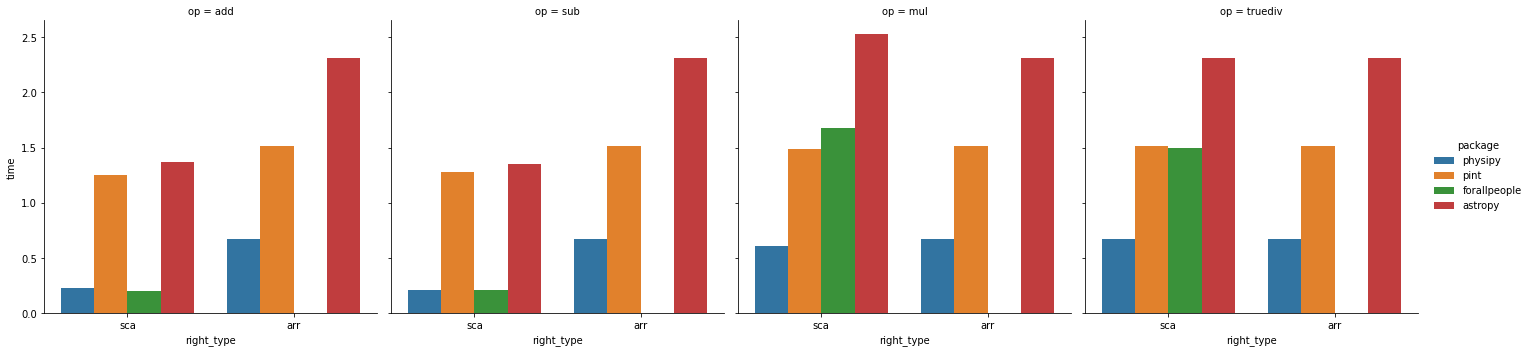

In [3]:
results = []

for modules_dict in [physipy_qs, pint_qs, fap_qs, asp_qs]:
    print(modules_dict["name"])
    for operation, operation_method in operations.items():
        aq = modules_dict["a"]
        bq = modules_dict["b"]
        #time = timeit.timeit('a.'+operation_method+"(b)", number=10000, globals=globals())
        time_q = timeit.timeit('aq.'+operation_method+"(bq)", number=N, globals={"aq":aq, "bq":bq})#), globals=globals())        
        #print(f"{operation: >5} : {time_q/time: <5.1f}")
        print(f"{operation :>5} : {time_q:.5f}")
        results.append((modules_dict['name'], operation, time_q, aq, bq, "sca", "sca", str(getattr(operator, operation)(aq, bq))))
    for operation, operation_method in operations.items():
        aq = modules_dict["a"]
        arrq = modules_dict["arrm"]
        #time = timeit.timeit('a.'+operation_method+"(b)", number=10000, globals=globals())
        try:
            time_qarr = timeit.timeit('aq.'+operation_method+"(arr)", number=N, globals={"aq":aq, "arr":arrq})#), globals=globals())      
            print(f"{operation :>5} : {time_qarr:.5f}")
            results.append((modules_dict['name'], operation, time_q, aq, arrq, "sca", "arr", str(getattr(operator, operation)(aq, arrq))))

        except Exception as e:
            print(f"{operation :>5} : {e}")
            
            results.append((modules_dict['name'], operation, np.nan, aq, arrq, "sca", "arr", "Failed"))
import pandas as pd
import seaborn as sns
df = pd.DataFrame(results, columns=["package", "op", "time", "left", "right", "left_type", "right_type", "result"])
sns.catplot(
    col="op", x="right_type", y="time", hue="package", data=df, kind="bar")

In [ ]:
physipy
  add : 0.26833
  sub : 0.24462
  mul : 0.96287
truediv : 1.05938
  add : 0.33669
  sub : 0.33431
  mul : 1.21743
truediv : 1.50563

In [5]:
aq=a*physipy.m
arrm = arr*physipy.m

In [12]:
%timeit arr*a
%timeit aq*arrm

717 ns ± 1.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
19.1 µs ± 66 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
arrm

<Quantity : [1 2 3] m>

In [ ]:
physipy
  add : 0.57792
  sub : 0.58624
  mul : 1.10884
truediv : 1.20130
  add : 0.69919
  sub : 0.74585
  mul : 1.34999
truediv : 1.72294

physipy
  add : 0.58849
  sub : 0.59637
  mul : 1.10718
truediv : 1.19365
  add : 0.75698
  sub : 0.79829
  mul : 1.34892
truediv : 1.63579

In [1]:
import timeit

operations = {
    "add":"__add__", 
    "sub":"__sub__",
    "mul":"__mul__",
}

In [19]:
import pint
import physipy
import forallpeople
import numpy as np

ureg = pint.UnitRegistry()

a = 123456
b = 654321
arr = np.arange(100)

In [23]:
physipy_qs = {
    "name":"physipy",
    "a":a*physipy.m,
    "b":b*physipy.m,
    'arrm':arr*physipy.m,
}
pint_qs = {
    "name":"pint",
    "a":a*ureg.m,
    "b":b*ureg.m,
    'arrm':arr*ureg.m,
}
fap_qs = {
    "name":"forallpeople",
    "a":a*forallpeople.m,
    "b":b*forallpeople.m, 
    'arrm':arr*forallpeople.m, 
}

for modules_dict in [physipy_qs, pint_qs, fap_qs]:
    print(modules_dict["name"])
    for operation, operation_method in operations.items():
        aq = modules_dict["a"]
        bq = modules_dict["b"]
        #time = timeit.timeit('a.'+operation_method+"(b)", number=10000, globals=globals())
        time_q = timeit.timeit('aq.'+operation_method+"(bq)", number=10000, globals=globals())        
        #print(f"{operation: >5} : {time_q/time: <5.1f}")
        print(f"{operation :>5} : {time_q:.5f}")
    for operation, operation_method in operations.items():
        aq = modules_dict["a"]
        arr = modules_dict["arrm"]
        #time = timeit.timeit('a.'+operation_method+"(b)", number=10000, globals=globals())
        time_qarr = timeit.timeit('aq.'+operation_method+"(arr)", number=10000, globals=globals())
        
        #print(f"{operation: >5} : {time_q/time: <5.1f}")
        print(f"{operation :>5} : {time_qarr:.5f}")

physipy
  add : 0.15226
  sub : 0.11834
  mul : 0.22262
  add : 2.31834
  sub : 2.19373
  mul : 2.49435
pint
  add : 0.08753
  sub : 0.08644
  mul : 0.11502
  add : 2.27910
  sub : 2.18198
  mul : 2.37741
forallpeople
  add : 0.02015
  sub : 0.02010
  mul : 0.51084
  add : 4.38325
  sub : 4.35334


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Array creation

Compare lazy creation of arrays

In [ ]:
%timeit asqarray([0*m, 2*m])
%timeit [0, 2]*m

## Profiling base operations

In [1]:
from physipy import m, s, rad, sr

In [ ]:
bench_scalar_op_add
bench_scalar_op_mul
bench_arr_scalar_op_add
bench_arr_scalar_op_mul

In [ ]:
#%prun -D prunsum -s time m+m 
%prun -D prunsum_file -s nfl use_case()
!snakeviz prunsum_file

 
*** Profile stats marshalled to file 'prunsum_file'. 
snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fmocquin%2FDocuments%2FCLE%2FOptique%2FPython%2FJUPYTER%2FMYLIB10%2FMODULES%2Fphysipy%2Fdocs%2Fnotebooks%2Fprunsum_file


Ideas for better performances : 
 - less 'isinstance'
 - remove sympy 
 - cleaner 'setattr'

In [10]:
%%prun -s cumulative -D prundump
m + m
2 * m
2*s /(3*m)
m**3

 
*** Profile stats marshalled to file 'prundump'. 


         453 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 quantity.py:168(__mul__)
       11    0.000    0.000    0.000    0.000 quantity.py:92(__init__)
       66    0.000    0.000    0.000    0.000 quantity.py:100(__setattr__)
       13    0.000    0.000    0.000    0.000 dimension.py:83(__init__)
        5    0.000    0.000    0.000    0.000 quantity.py:1312(quantify)
        3    0.000    0.000    0.000    0.000 dimension.py:143(__mul__)
        1    0.000    0.000    0.000    0.000 quantity.py:182(__truediv__)
        1    0.000    0.000    0.000    0.000 quantity.py:150(__add__)
        1    0.000    0.000    0.000    0.000 quantity.py:213(__pow__)
        5    0.000    0.000    0.000    0.000 decorato

In [ ]:
!snakeviz prundump

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fmocquin%2FDocuments%2FCLE%2FOptique%2FPython%2FJUPYTER%2FMYLIB10%2FMODULES%2Fphysipy%2Fdocs%2Fprundump


## Profiling tests

In [2]:
import sys
sys.path.insert(0,r"/Users/mocquin/MYLIB10/MODULES/physipy/test")
import physipy
import test_dimension
import unittest
from physipy import Quantity, Dimension

In [14]:
from test_dimension import TestClassDimension
from test_quantity import TestQuantity

In [24]:
suite = unittest.defaultTestLoader.loadTestsFromTestCase(TestQuantity)

...............................................................................
----------------------------------------------------------------------
Ran 79 tests in 0.704s

OK


 
*** Profile stats marshalled to file 'prun'. 


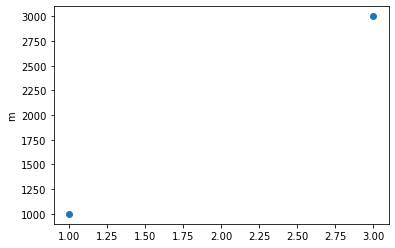

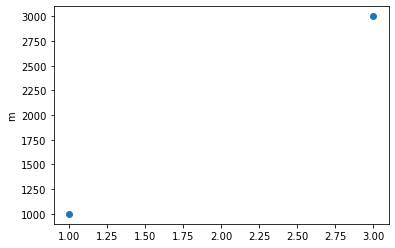

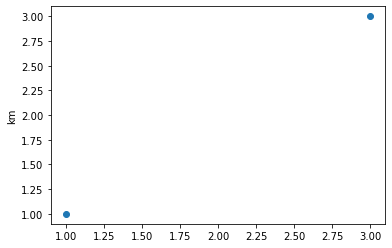

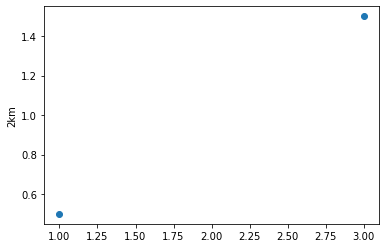

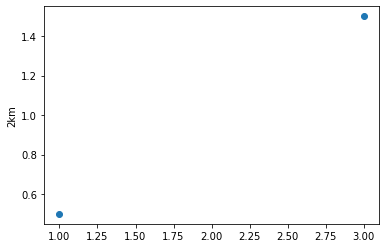

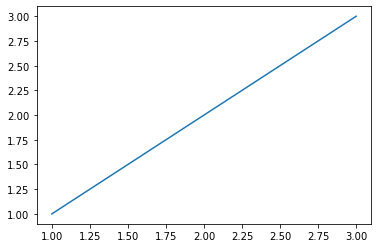

         620486 function calls (617025 primitive calls) in 0.705 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   102915    0.023    0.000    0.030    0.000 {built-in method builtins.isinstance}
    54045    0.062    0.000    0.099    0.000 quantity.py:100(__setattr__)
    30984    0.004    0.000    0.004    0.000 inspect.py:2539(kind)
    23569    0.003    0.000    0.003    0.000 {method 'items' of 'dict' objects}
    19009    0.007    0.000    0.009    0.000 numeric.py:1865(isscalar)
    16170    0.002    0.000    0.002    0.000 inspect.py:2527(name)
    14014    0.003    0.000    0.007    0.000 {built-in method builtins.next}
    12532    0.005    0.000    0.006    0.000 {built-in method builtins.getattr}
    10819    0.002    0.000    0.002    0.000 {method 'get' of 'dict' objects}
    10647    0.003    0.000    0.008    0.000 {built-in method builtins.hasattr}
    10185    0.001    0.000    0.001    0.000 {method 'keys'

In [25]:
%%prun -s calls -D prun
unittest.TextTestRunner().run(suite)

In [ ]:
!snakeviz prun

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fmocquin%2FDocuments%2FCLE%2FOptique%2FPython%2FJUPYTER%2FMYLIB10%2FMODULES%2Fphysipy%2Fdocs%2Fprun


In [7]:
%timeit Quantity(1, Dimension(None))

7.4 µs ± 613 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
%timeit Quantity(1, Dimension(None))

6.72 µs ± 47.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
testdim = test_dimension.TestClassDimension()

In [6]:
testdim.run()

AttributeError: 'TestClassDimension' object has no attribute 'runTest'

In [8]:
%cd ..

/Users/mocquin/Documents/CLE/Optique/Python/JUPYTER/MYLIB10/MODULES/physipy


In [12]:
#%cd
%prun -s module !python -m unittest

..........................................<__array_function__ internals>:5: DeprecationWarning: `np.alen` is deprecated, use `len` instead
....................................................
----------------------------------------------------------------------
Ran 94 tests in 0.524s

OK
 

         8370 function calls in 2.352 seconds

   Ordered by: file name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.352    2.352 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 __init__.py:214(_acquireLock)
        1    0.000    0.000    0.000    0.000 __init__.py:223(_releaseLock)
        1    0.000    0.000    0.000    0.000 _process_posix.py:60(sh)
        1    0.001    0.001    2.250    2.250 _process_posix.py:121(system)
      139    0.001    0.000    0.001    0.000 contextlib.py:82(__init__)
      139    0.000    0.000    0.000    0.000 contextlib.py:108(__enter__)
      139    0.000    0.000    0.001    0.000 contextlib.py:117(__exit__)
      139    0.000    0.000    0.001    0.000 contextlib.py:238(helper)
       40    0.000    0.000    0.000    0.000 exceptions.py:10(__init__)
       42    0.000    0.000    0.000    0.000 expect.py:6(__init__)
      129    0.001    0.000    0.001    0.000 expect.p